# Linear Regression

In [20]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [3]:
# reading through the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(df.sort_values('charges').head(3))
print(df.sort_values('charges').tail(3))

      age   sex    bmi  children smoker     region    charges
940    18  male  23.21         0     no  southeast  1121.8739
808    18  male  30.14         0     no  southeast  1131.5066
1244   18  male  33.33         0     no  southeast  1135.9407
      age     sex     bmi  children smoker     region      charges
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309
543    54  female  47.410         0    yes  southeast  63770.42801


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
df.drop_duplicates(inplace=True)


In [18]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# detecting unique variables
unique_var = df.nunique()==1

if any(unique_var): 
    for col in unique_var.index[unique_var] : print(f"The variable {i} content only one category.")
else: print(f"There's no variable with only one category.")

aux = df.nunique()

print(f''' 
      Categories:
        {aux}
      ''')

There's no variable with only one category.
 
      Categories:
        age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64
      


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


Text(0, 0.5, 'count')

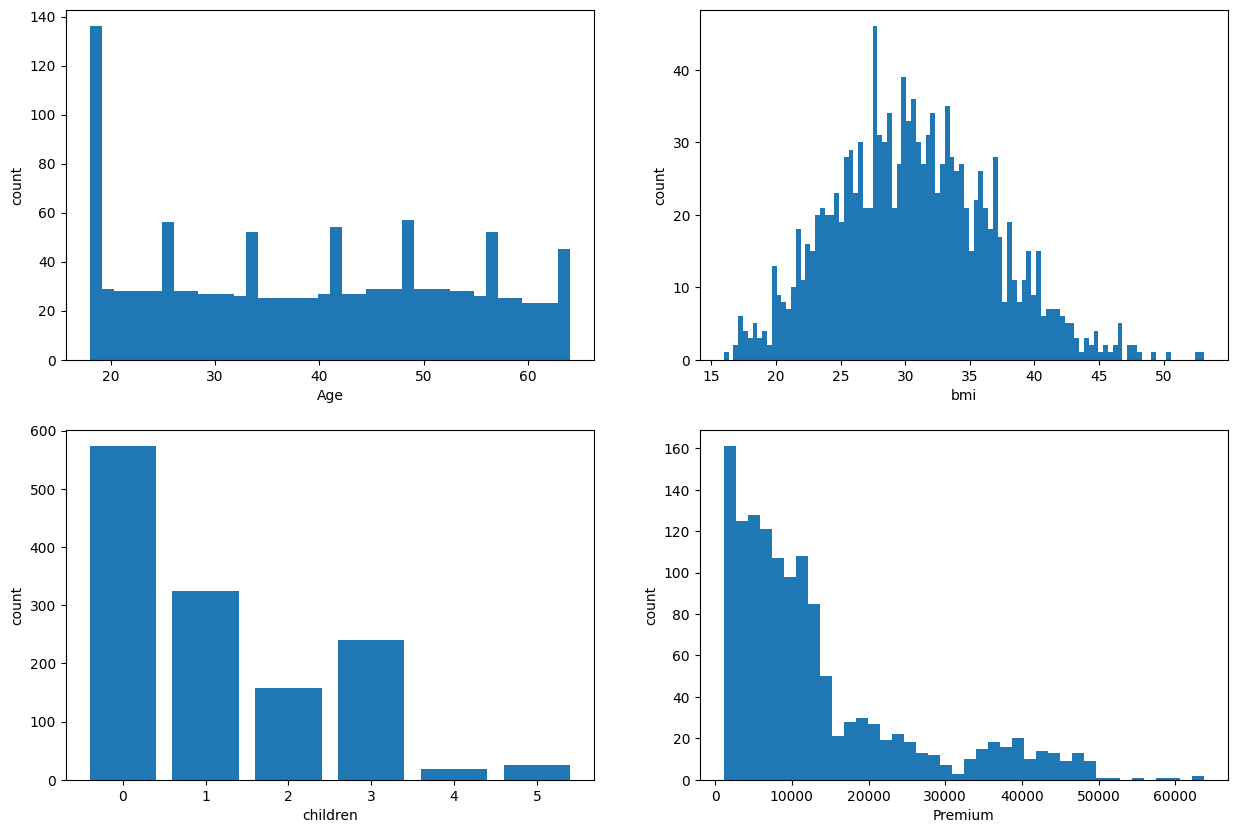

In [ ]:
# vizualizating numbers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.hist(df['age'], bins=40)
ax1.set_xlabel('Age')
ax1.set_ylabel('count')

ax2.hist(df['bmi'], bins=100)
ax2.set_xlabel('bmi')
ax2.set_ylabel('count')

xtemp = df['children'].unique()
ytemp = df.groupby('children')['children'].count()
ax3.bar(x=xtemp, height=ytemp)
ax3.set_xlabel('children')
ax3.set_ylabel('count')

ax4.hist(df['charges'], bins=40)
ax4.set_xlabel('Premium')
ax4.set_ylabel('count')

In [22]:
# let's divide the dataset
X = df.drop('charges',axis=1)
y = df['charges']

X_train, X_test = tts(X, test_size=0.2, random_state=100)

# y_train & y_test formed by indexes of X_train & X_test
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]